In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
%pwd

'/content'

In [5]:
%cd /content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficLightDetection

/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficLightDetection


In [6]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/166.8 GB disk)


In [7]:
!yolo detect predict model=yolov8l-seg.pt source="https://cdn1.epicgames.com/ue/product/Screenshot/3-1920x1080-2d0741389a27fd438c44e5ff90d27b39.jpg" show_labels=True show_boxes=False

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45973568 parameters, 0 gradients, 220.5 GFLOPs

Found https://cdn1.epicgames.com/ue/product/Screenshot/3-1920x1080-2d0741389a27fd438c44e5ff90d27b39.jpg locally at 3-1920x1080-2d0741389a27fd438c44e5ff90d27b39.jpg
image 1/1 /content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficLightDetection/3-1920x1080-2d0741389a27fd438c44e5ff90d27b39.jpg: 384x640 3 cars, 1 fire hydrant, 1 suitcase, 1 potted plant, 132.9ms
Speed: 13.1ms preprocess, 132.9ms inference, 966.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


img shape: (1080, 1920, 3)
img shape changed: (360, 640, 3)


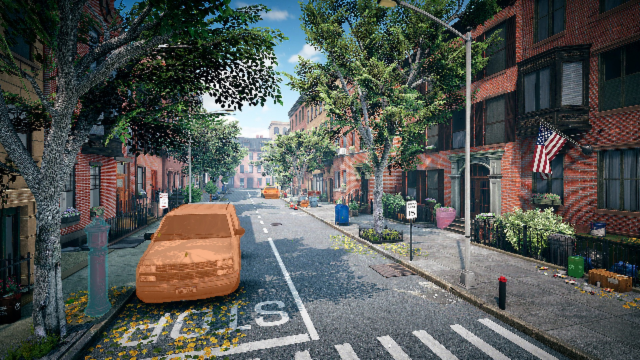

In [8]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

path="/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficLightDetection/runs/segment/predict/3-1920x1080-2d0741389a27fd438c44e5ff90d27b39.jpg"
img=cv2.imread(path)
print("img shape:",img.shape)
img=imutils.resize(img,width=640)
print("img shape changed:",img.shape)

cv2_imshow(img)

In [ ]:
####
#Library
#Image & Model
#Predicttion & Score
#Show results
####


0: 384x640 3 traffic lights, 122.4ms
Speed: 3.9ms preprocess, 122.4ms inference, 487.8ms postprocess per image at shape (1, 3, 384, 640)


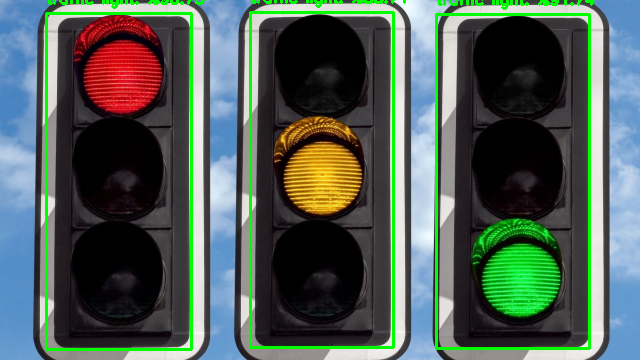

In [9]:
import cv2
import imutils
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

font = cv2.FONT_HERSHEY_SIMPLEX

img_path = "/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficLightDetection/inference/test.jpg"
model_path = "yolov8l.pt"

img = cv2.imread(img_path)
img=imutils.resize(img,width=640)
model = YOLO(model_path)

results = model(img)[0]

for result in results.boxes.data.tolist():
  x1, y1, x2, y2, score, class_id = result
  x1, y1, x2, y2, class_id = int(x1), int(y1), int(x2), int(y2), int(class_id)
  if score > 0.5:
    cv2.rectangle(img, (x1, y1), (x2,y2), (0,255,0), 2)

    score = score * 100
    class_name = results.names[class_id]

    text = f"{class_name}: %{score:.2f}"
    cv2.putText(img, text, (x1, y1-10), font, 0.5, (0,255,0), 2)

cv2_imshow(img) # PC: cv2.imshow("Prediction", img)

ÜSTTEKİLER ÇALIŞIUYOR MU MODEL TESTİ

In [18]:
!yolo detect train model=yolov8l.pt data=/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficLightDetection/data/dataset/data.yaml imgsz=640 workers=8 batch=8 device=0 epochs=50 name=yolov8_traffic_light

Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficLightDetection/data/dataset/data.yaml, epochs=50, time=None, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_traffic_light8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sa

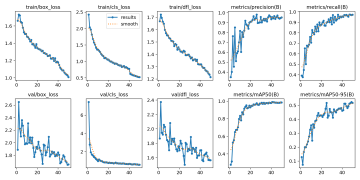

In [19]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

img_path="/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficLightDetection/runs/detect/yolov8_traffic_light8/results.png"
img=cv2.imread(img_path)
img=imutils.resize(img,width=360)

cv2_imshow(img)

In [22]:
!yolo detect predict model="/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficLightDetection/runs/detect/yolov8_traffic_light8/weights/best.pt" source="/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficLightDetection/data/dataset/test/images/traffic-light--119-_jpg.rf.65198e341a15fa6a0ba8be43a289c5f2.jpg"

Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficLightDetection/data/dataset/test/images/traffic-light--119-_jpg.rf.65198e341a15fa6a0ba8be43a289c5f2.jpg: 640x640 1 yellow, 62.9ms
Speed: 5.0ms preprocess, 62.9ms inference, 960.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [25]:
import cv2
import imutils
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

font = cv2.FONT_HERSHEY_SIMPLEX

img_path = "/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficLightDetection/inference/test.jpg"
model_path = "/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficLightDetection/runs/detect/yolov8_traffic_light8/weights/best.pt"

img = cv2.imread(img_path)
model = YOLO(model_path)

results = model(img)[0]

for result in results.boxes.data.tolist():
  x1, y1, x2, y2, score, class_id = result
  x1, y1, x2, y2, class_id = int(x1), int(y1), int(x2), int(y2), int(class_id)
  if score > 0.5:
    cv2.rectangle(img, (x1, y1), (x2,y2), (0,255,0), 4)

    score = score * 100
    class_name = results.names[class_id]

    text = f"{class_name}: %{score:.2f}"
    cv2.putText(img, text, (x1+3, y1+25), font, 1, (0,0,255), 4)

cv2_imshow(img) # PC: cv2.imshow("Prediction", img)

WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 109.3ms
image 2/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 39.3ms
Speed: 2.4ms preprocess, 74.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


AttributeError: 'NoneType' object has no attribute 'clip'

In [26]:
!yolo detect predict model="/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficLightDetection/runs/detect/yolov8_traffic_light8/weights/best.pt" source="/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficLightDetection/inference/ets2.mp4"

Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs

video 1/1 (1/563) /content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficLightDetection/inference/ets2.mp4: 384x640 (no detections), 103.5ms
video 1/1 (2/563) /content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficLightDetection/inference/ets2.mp4: 384x640 (no detections), 39.4ms
video 1/1 (3/563) /content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficLightDetection/inference/ets2.mp4: 384x640 (no detections), 39.4ms
video 1/1 (4/563) /content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficLightDetection/inference/ets2.mp4: 384x640 (no detections), 39.4ms
video 1/1 (5/563) /content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficLightDetection/inference/ets2.mp4: 384x640 (no detections), 39.4ms
video 1/1 (6/563) /content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/Tra

In [27]:
from google.colab import files

files.download("/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/TrafficLightDetection/runs/detect/predict3/ets2.avi")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>